START

In [1]:
# Import Packages 
import sys
import pandas as pd 
import os 
import json
import pickle

# 1. Set `PYTHONHASHSEED` environment variable at a fixed value
import os
# os.environ['PYTHONHASHSEED']=str(42)

# 2. Set `python` built-in pseudo-random generator at a fixed value
import random
random.seed(42)

# 3. Set `numpy` pseudo-random generator at a fixed value
import numpy as np
np.random.seed(42)

import os 
cwd = os.getcwd()

# move to previous direc
os.chdir('../')
cwd = os.getcwd()
print(cwd)

# move to data direc
os.chdir('./data')
cwd = os.getcwd()
print(cwd)


from datetime import date
today = date.today()

# Reading Raw Data 
df = pd.read_pickle(f'/Users/shashankgupta/Documents/code/git_project/Response model final/response_model/data/novo_features_response_2022-12-11.pkl')
# df2 = pd.read_pickle('')
print(f"raw data file loaded with shape : {df.shape} ")

# Import Sklearn Modules 
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np

# move to previous direc
os.chdir('../')
cwd = os.getcwd()
print(cwd)

# move to code/src direc
os.chdir('./code/src')
cwd = os.getcwd()
print(cwd)

from utils import Utils
from pipeline_blocks import PipelineBlocks
from pipeline import PipelineTypes, PipelineTest

# move to modules direc
os.chdir('./modules')
cwd = os.getcwd()
print(cwd)

os.chdir('/Users/shashankgupta/Documents/code/git_project/Response model final/response_model/code/src/modules')
cwd = os.getcwd()
print(cwd)

# Import Other Modules
from preprocess import Convert, MissingValues, Outlier, FeatureSelection
from transform import Scaler, Transform, Selection
from modeling import ModelBuild, ModelMetric
from gridsearch import Grid
print(f"custom novo ds modules loaded ..")


# Opening Params Json File

# move to previous direc
os.chdir('../')
cwd = os.getcwd()
print(cwd)

# move to previous direc
os.chdir('../')
cwd = os.getcwd()
print(cwd)

# move to params folder
os.chdir('./params')
cwd = os.getcwd()
print(cwd)

f = open('params.txt')
params_data = json.load(f)
print(f"params file loaded ..")
params_data['model'] = LogisticRegression()

params_data['forward_move'] = True
params_data['params_log_reg']['class_weight'] = {0:0.15,1:0.85}
params_data['pipeline_os']['scale_type']= StandardScaler()
print(f"{params_data}")

/Users/shashankgupta/Documents/code/git_project/Response model final/response_model
/Users/shashankgupta/Documents/code/git_project/Response model final/response_model/data
raw data file loaded with shape : (6261, 437) 
/Users/shashankgupta/Documents/code/git_project/Response model final/response_model
/Users/shashankgupta/Documents/code/git_project/Response model final/response_model/code/src
params file loaded ..
params file loaded ..
{'seed': 42, 'test_size': 0.3, 'target': 'response_target', 'corr_thresh': 0.3, 'vif_thresh': 7, 'model': LogisticRegression(), 'forward_move': True, 'num_features': 20, 'bins': 5, 'upper_iv': 0.5, 'lower_iv': 0.02, 'params_log_reg': {'penalty': 'l1', 'random_state': 42, 'solver': 'liblinear', 'class_weight': {0: 0.2, 1: 0.8}}, 'pipeline_os': {'scale_type': StandardScaler(), 'target': 'response_target'}}
utils module loaded ..
custom novo ds modules loaded ..
all objects inititated ..

Basic Flow : 

    Preprocess -> Transform -> Model Building -> Metr

In [2]:
df.shape

(6261, 437)

In [3]:
# Object Initiation 
sc_min_max = Scaler(MinMaxScaler())
sc_std_scaler = Scaler(StandardScaler())
sc_robust_scaler = Scaler(RobustScaler())
sc_norm = Scaler(Normalizer())

cv = Convert()
mv = MissingValues()
ot = Outlier()
ut = Utils()

tf = Transform()
sel = Selection()
ft = FeatureSelection()

mb = ModelBuild()
mm = ModelMetric()

pb = PipelineBlocks()
pt = PipelineTypes()
ptest = PipelineTest()

print(f"all objects inititated ..")

all objects inititated ..


In [4]:
print("""
Basic Flow : 

    Preprocess -> Transform -> Model Building -> Metrics 

""")
'final_email', 'product', 'segment', 'interest_rate'


exclude_list = [
    'account_create_date', 'third_payment_date', 'email_sent_at','business_id','cutoff_date',
    'plaid_business_id', 'signed_on_x', 'external_acc_list',
    'business_pitch', 'ext_business_id', 'product_id', 'Final_email', 'Product','Segment','Interest_rate',
    'first_payment_date', 'email_sent_date', 'biz_id', 'loan_taken_date',
    'business_id_y', 'date_of_establishment', 'purpose_of_account',
    'business_id_x', 'second_payment_date', 'context_traits_email',
    'signed_on_y','fpd', 'ext_acc_flag','plaid_data_flag', 'fpd_plus_3', 'fpd_plus_2',
    'fpd_plus_1', 'fpd_plus_4','product_type', 'past_1_month','past_2_month', 'past_3_month', 'running_balance',
    'num_days_square_off', 'first_payment_flag' , 'credit_limit', \
    'email_sent_hour','rating','email_domain','business_type','industry_category_name','application_channel','incoming_wire_transfer','email_sent_weekday',\
        'signed_on_x', 'signed_on_y', 'second_payment_date',
       'third_payment_date', 'account_create_date', 'date_of_establishment',
       'email_sent_date', 'loan_taken_date','date_of_refresh', 'created_at','estimated_monthly_revenue',\
        'incoming_ach_payments',
       'check_deposit_amount', 'outgoing_ach_and_checks',
       'outgoing_wire_transfers','is_pd'
    ]

    # ['count_web_logins_per_month', 'count_web_logins_per_quarter','count_android_logins_per_day', 'count_android_logins_per_month',
    # 'count_android_logins_per_quarter', 'count_percent_ios_by_all','count_percent_android_by_all', 'count_percent_web_by_all',
    # 'has_website','years_on_book', 'count_all_logins', 'count_all_logins_per_day','count_all_logins_per_month', 'count_all_logins_per_quarter',
    # 'count_ios_logins_per_day', 'count_ios_logins_per_month',
    # 'count_ios_logins_per_quarter', 'count_web_logins_per_day','months_on_book', 'quarters_on_book','days_on_book','estimated_monthly_revenue', 'incoming_ach_payments',
    # 'check_deposit_amount', 'outgoing_ach_and_checks',
    # 'outgoing_wire_transfers','count_android_logins_per_day',
    # 'count_android_logins_per_month','count_android_logins_per_quarter',
    # 'count_percent_android_by_all','rolling_30_all_credits_active',
    # 'rolling_60_all_credits_active',
    # 'rolling_90_all_credits_active',
    # 'rolling_180_all_credits_active',
    # 'rolling_30_all_debits_active',
    # 'rolling_60_all_debits_active',
    # 'rolling_90_all_debits_active',
    # 'rolling_180_all_debits_active','number_of_employees','count_web_logins','count_ios_logins'
    # ]

print(len(exclude_list))

# low_variance_list = ['stddev_amount_tax_credit_1m',\
#     'stddev_amount_insurance_credit_3m','distinct_insurance_debit_txns_1m',
#     'median_amount_insurance_credit_1m','stddev_amount_insurance_credit_1m',
#     'avg_amount_insurance_credit_1m', 'distinct_ach_d_txns_1000_1m', 
#     'amount_insurance_credit_1m', 'distinct_insurance_credit_txns_6m', 
#     'zero_balance_count_1m', 'distinct_insurance_credit_txns_3m', 
#     'insurance_credit_size_1m', 'distinct_loan_credit_txns_6m','ratio_insurance_debit_total_debit_1m']

#low_var_list2 = ['amount_tax_credit_1m', 'avg_amount_tax_credit_1m', 'median_amount_tax_credit_1m', 'stddev_amount_tax_credit_1m', 'tax_credit_size_1m']



Basic Flow : 

    Preprocess -> Transform -> Model Building -> Metrics 


65


In [5]:
df.head()

,business_id,Final_email,Product,Segment,credit_limit,Interest_rate,context_traits_email,email_sent_at,biz_id,signed_on_x,...,count_web_logins_per_day,count_web_logins_per_month,count_web_logins_per_quarter,count_android_logins_per_day,count_android_logins_per_month,count_android_logins_per_quarter,count_percent_ios_by_all,count_percent_android_by_all,count_percent_web_by_all,has_website
0,6d42e506-678e-466b-9e3f-339690855898,contact@rmirmarket.com,INSTL,Declinin,1000,18,contact@rmirmarket.com,2022-06-03 20:11:40.000,None,NaT,...,0.02,0.0,2.0,0.0,0.0,0.0,73.0,0.0,27.0,1
1,fe80a1fd-ebb0-4ed3-b691-0578396cc757,poochcarriagecrew@gmail.com,LOC,Declinin,2000,18,poochcarriagecrew@gmail.com,2022-06-17 17:47:41.000,None,NaT,...,0.02,1.0,2.0,0.0,0.0,0.0,78.0,0.0,22.0,1
2,58eef423-fb7b-4d17-a20d-dded2f9be440,balabmi@gmail.com,INSTL,Sustaining,6000,18,balabmi@gmail.com,2022-06-03 20:11:27.000,None,NaT,...,0.05,2.0,6.0,0.0,0.0,0.0,88.0,0.0,12.0,1
3,6823f6da-af22-4d1a-b7b3-4038079d64b9,rojografito@gmail.com,LOC,Steady,2000,18,rojografito@gmail.com,2022-06-15 18:37:40.000,None,NaT,...,0.00,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,1
4,77125e69-1002-4234-b33f-33d2540b945c,wildmoonboutique21@gmail.com,LOC,Growing,2000,18,wildmoonboutique21@gmail.com,2022-06-17 17:47:43.000,None,NaT,...,0.00,0.0,0.0,0.0,0.0,0.0,99.0,0.0,1.0,1


In [6]:
# filter for first payment

df_raw = df.copy()

df_raw = df_raw.drop(exclude_list,axis=1)
#df = df.drop(low_var_list2,axis=1)
# print(f"After 1 Month Ageing : {df_raw.shape} ")
df_raw.head()

,response_target,ratio_pd_freq_90_180,ratio_pd_amt_90_180,is_ach_credit,ratio_ach_credit_freq_90_180,ratio_ach_credit_amt_90_180,is_ach_debit,ratio_ach_debit_freq_90_180,ratio_ach_debit_amt_90_180,is_mrdc,...,count_web_logins_per_day,count_web_logins_per_month,count_web_logins_per_quarter,count_android_logins_per_day,count_android_logins_per_month,count_android_logins_per_quarter,count_percent_ios_by_all,count_percent_android_by_all,count_percent_web_by_all,has_website
0,0,0.000000,0.000000,1.0,0.585366,0.462708,1.0,0.304348,0.293455,0.0,...,0.02,0.0,2.0,0.0,0.0,0.0,73.0,0.0,27.0,1
1,0,1.000000,1.000000,1.0,0.410959,0.319784,1.0,0.388889,0.296990,1.0,...,0.02,1.0,2.0,0.0,0.0,0.0,78.0,0.0,22.0,1
2,0,0.000000,0.000000,1.0,0.666667,0.720092,1.0,0.500000,0.847325,1.0,...,0.05,2.0,6.0,0.0,0.0,0.0,88.0,0.0,12.0,1
3,0,0.000000,0.000000,1.0,0.500000,0.765957,0.0,0.000000,0.000000,1.0,...,0.00,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,1
4,0,0.826087,0.575177,1.0,0.742857,0.616939,1.0,0.928571,0.866692,0.0,...,0.00,0.0,0.0,0.0,0.0,0.0,99.0,0.0,1.0,1


In [7]:
df_raw.select_dtypes(include=['object']).columns

Index(['number_of_employees'], dtype='object')

In [8]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6261 entries, 0 to 6260
Columns: 380 entries, response_target to has_website
dtypes: float64(310), int64(69), object(1)
memory usage: 18.2+ MB


In [9]:
df_raw['number_of_employees'] = df_raw['number_of_employees'].astype('int64')

In [10]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6261 entries, 0 to 6260
Columns: 380 entries, response_target to has_website
dtypes: float64(310), int64(70)
memory usage: 18.2 MB


In [11]:
df_raw.describe()

,response_target,ratio_pd_freq_90_180,ratio_pd_amt_90_180,is_ach_credit,ratio_ach_credit_freq_90_180,ratio_ach_credit_amt_90_180,is_ach_debit,ratio_ach_debit_freq_90_180,ratio_ach_debit_amt_90_180,is_mrdc,...,count_web_logins_per_day,count_web_logins_per_month,count_web_logins_per_quarter,count_android_logins_per_day,count_android_logins_per_month,count_android_logins_per_quarter,count_percent_ios_by_all,count_percent_android_by_all,count_percent_web_by_all,has_website
count,6261.000000,6261.000000,6261.000000,6261.000000,6261.000000,6261.000000,6261.000000,6261.000000,6261.000000,6261.000000,...,6261.000000,6261.000000,6261.000000,6261.000000,6261.000000,6261.000000,6261.000000,6261.000000,6261.000000,6261.0
mean,0.125220,0.252253,0.253691,0.938668,0.465891,0.479133,0.819518,0.413941,0.413671,0.406005,...,0.041779,1.220732,3.832455,0.000008,0.000160,0.000639,88.532982,0.007986,11.458393,1.0
std,0.330994,0.313601,0.327013,0.239958,0.240189,0.271747,0.384619,0.304801,0.336586,0.491125,...,0.105562,3.241035,9.745838,0.000419,0.012638,0.030953,12.279196,0.238338,12.282370,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000,0.000000,1.0
25%,0.000000,0.000000,0.000000,1.000000,0.375000,0.339361,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,81.000000,0.000000,1.000000,1.0
50%,0.000000,0.000000,0.000000,1.000000,0.500000,0.498809,1.000000,0.466667,0.443151,0.000000,...,0.010000,0.000000,1.000000,0.000000,0.000000,0.000000,93.000000,0.000000,7.000000,1.0
75%,0.000000,0.500000,0.500000,1.000000,0.578947,0.631577,1.000000,0.590909,0.643508,1.000000,...,0.040000,1.000000,4.000000,0.000000,0.000000,0.000000,99.000000,0.000000,19.000000,1.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,2.100000,64.000000,191.000000,0.030000,1.000000,2.000000,100.000000,12.000000,80.000000,1.0


In [12]:
## Sanity check on ratio col
cols = df_raw.columns
ratio_dict = {}
ratio_cols = []

for col in [x for x in cols if 'ratio' in x]:
    ratio_cols.append(col)
    ratio_dict[col] = max(df_raw[col])


In [13]:
#removing cols with zero variance
zero_var = []
for col in df_raw.columns:
    if df_raw[col].std(axis=0) == 0:
        zero_var.append(col)

df_raw.drop(zero_var,axis=1,inplace=True)

In [14]:
len(zero_var)

64

In [15]:
df_raw.shape

(6261, 316)

In [16]:
# df_raw.to_pickle("df_raw_rs1.pkl")

In [17]:
gr = Grid()

In [18]:
# Grid Search 
grid_search_params = {'corr_arr' : [0.3,0.5],
                        'vif_arr' : [5,7],
                            'features_arr' : [10, 15],
                                'fmove_arr' : [True,False]}

corr_arr = grid_search_params['corr_arr']
vif_arr = grid_search_params['vif_arr']
features_arr = grid_search_params['features_arr']
fmove_arr = grid_search_params['fmove_arr']


experiments_df_Root, model_arr = gr.run_grid_search_pipe_OS(corr_arr,vif_arr,features_arr,fmove_arr,df_raw)
experiments_df_Root = experiments_df_Root.sort_values(by='Test_AUC',ascending=False)

#experiments_df_Root.to_csv('new_experiments_2.csv')

Number of Models Done : 0
x_train.shape = (4382, 315) | y_train.shape = (4382,) | x_test.shape = (1879, 315) | y_test.shape = (1879,)
# remove constant features
(4382, 315)
# remove quasi constant features
(4382, 298)
# imputing columns with respective median
preprocess step complete for x train
# running pipeline scale for x train
scaling step complete for x train
features remaining afte IV elimination : 152
# remove correlated features
starting feature elimination using correlation method, threshold : 0.3
features remaining after corr elimination : 25
starting feature elimination using VIF method, threshold : 5..
Starting Forward Selection..
Features remaning after Forward Selection : 10
Accuracy Score: 0.76 

AUC: 0.66 

model metric collection complete for x train
preprocess step complete for x test
Accuracy Score: 0.79 

AUC: 0.68 

model metric collection complete for x test
response_target
Number of Models Done : 1
x_train.shape = (4382, 315) | y_train.shape = (4382,) | x_test.s

In [19]:
experiments_df_Root.shape

(384, 11)

In [20]:
# experiments_df_Root.to_pickle('models_df_384.pkl')

In [21]:
experiments_df_Root['delta'] = np.abs(experiments_df_Root['Test_AUC'] - experiments_df_Root['Train_AUC'])
experiments_df_Root[(experiments_df_Root['is_train_ro']==True)&(experiments_df_Root['is_test_ro']==True)].sort_values(by='delta',ascending=True).head(20)

,cols,corr_thresh,vif_thresh,forward_move,num_features,Train_AUC,Test_AUC,seed,is_train_ro,is_test_ro,is_all_ro,delta
184,"[ratio_card_withdrawal_amt_90_180, median_amou...",0.5,5,True,10,0.7,0.7,12,True,True,True,0.0
362,"[debit_size_1m, pd_size_6m, distinct_ach_c_txn...",0.5,5,True,15,0.69,0.69,23,True,True,True,0.0
366,"[debit_size_1m, pd_size_6m, distinct_ach_c_txn...",0.5,7,True,15,0.69,0.69,23,True,True,True,0.0
235,"[ratio_mrdc_amt_90_180, ratio_card_withdrawal_...",0.5,5,False,15,0.7,0.7,15,True,True,True,0.0
279,"[ratio_ach_debit_amt_90_180, ratio_card_withdr...",0.3,7,False,15,0.68,0.68,18,True,True,True,0.0
322,"[ratio_ach_credit_amt_90_180, ratio_card_withd...",0.3,5,True,15,0.68,0.68,21,True,True,True,0.0
323,"[ratio_ach_credit_amt_90_180, ratio_card_withd...",0.3,5,False,15,0.68,0.68,21,True,True,True,0.0
334,"[ratio_ach_credit_amt_90_180, debit_size_1m, p...",0.5,7,True,15,0.7,0.7,21,True,True,True,0.0
329,"[debit_size_1m, median_amount_ach_c_3m, stddev...",0.5,5,False,10,0.7,0.7,21,True,True,True,0.0
238,"[ratio_card_withdrawal_amt_90_180, median_amou...",0.5,7,True,15,0.7,0.7,15,True,True,True,0.0


In [33]:
temp = experiments_df_Root[(experiments_df_Root['corr_thresh']==0.5)&(experiments_df_Root['vif_thresh']==5)&(experiments_df_Root['num_features']==10)&(experiments_df_Root['is_train_ro']==True)&(experiments_df_Root['is_test_ro']==True)]

In [34]:
temp.shape

(47, 12)

<AxesSubplot:ylabel='Test_AUC'>

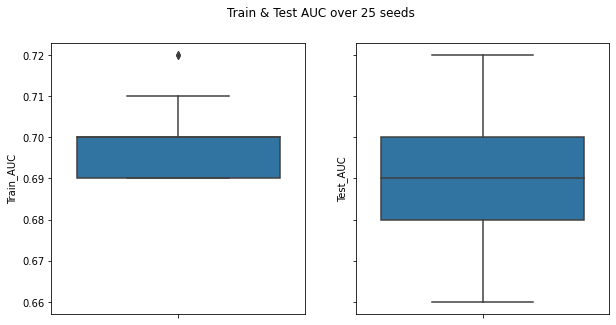

In [41]:
import seaborn as sns
from matplotlib import pyplot as plt
fig, ax = plt.subplots(1,2, figsize=(10, 5), sharey=True)
fig.suptitle('Train & Test AUC over 25 seeds')
sns.boxplot(data=temp, y='Train_AUC',ax=ax[0])
sns.boxplot(data=temp, y='Test_AUC',ax=ax[1])

In [22]:
params = {"seed" : 12,
"test_size" : 0.3,
"target" : "response_target",
"corr_thresh": 0.5,
"vif_thresh": 5,
"model" : "LogisticRegression()",
"forward_move" : True,
"num_features" : 10,
"bins" : 5,
"upper_iv" : 0.5,
"lower_iv" : 0.01,
"params_log_reg" : {"penalty": "l1", "random_state": 42, "solver": "liblinear", "class_weight":{1:0.85,0:0.15}},
"pipeline_os" : {"scale_type" : StandardScaler(), "target" : "response_target"}}

In [23]:
model = model_arr[184]
selected_features = list(model.feature_names_in_)

In [29]:
pickle.dump(model, open('best_model_10.pkl', 'wb'))

In [24]:
selected_features

['ratio_card_withdrawal_amt_90_180',
 'median_amount_credited_3m',
 'distinct_ach_d_txns_3m',
 'distinct_card_txns_100_1m',
 'ratio_total_freq_debit_credit_6m',
 'ratio_debit_credit_1m',
 'stddev_running_balance_6m',
 'number_of_employees',
 'business_age_months',
 'months_on_book']

In [ ]:
# temp_train.to_pickle('temp_train.pkl')
# temp_test.to_pickle('temp_test.pkl')
# df_raw.to_pickle('df_raw.pkl')

In [44]:
scale_train_object.feature_names_in_

array(['ratio_card_withdrawal_amt_90_180', 'median_amount_credited_3m',
       'distinct_ach_d_txns_3m', 'distinct_card_txns_100_1m',
       'ratio_total_freq_debit_credit_6m', 'ratio_debit_credit_1m',
       'stddev_running_balance_6m', 'number_of_employees',
       'business_age_months', 'months_on_book'], dtype=object)

In [45]:
pickle.dump(train_model, open('response_model_final.pkl', 'wb'))
pickle.dump(scale_train_object, open('response_scale_train_object.pkl', 'wb'))
train_data_params.to_pickle('response_train_data_params.pkl')

In [25]:
feat_imp, train_ro, test_ro, all_ro, train_metrics, test_metrics, train_model, scale_train_object, minmax_train, temp_train, temp_test, y_train, y_test,df_prep, train_data_params, train_min_max_params \
= ptest.Pipeline_OS_2_Test(df_raw,selected_features,params)

x_train.shape = (4382, 315) | y_train.shape = (4382,) | x_test.shape = (1879, 315) | y_test.shape = (1879,)
# remove constant features
(4382, 314)
# remove quasi constant features
(4382, 298)
# imputing columns with respective median
preprocess step complete for x train
preprocess step complete for x train
# running pipeline scale for x train
scaling step complete for x train
Accuracy Score: 0.78 

AUC: 0.7 

model metric collection complete for x train
preprocess step complete for x test
Accuracy Score: 0.77 

AUC: 0.7 

model metric collection complete for x test
CV Scores for Train - [0.77 0.78 0.8  0.78 0.81]
Mean of CV Scores Train - 0.79
CV Scores for Test - [0.79 0.76 0.7  0.81 0.76]
Mean of CV Scores Test - 0.77
scaling step complete for x test


response_target


In [26]:
train_ro

,volume_binned,response_target_rate (%),volume,volume %
0,"(-0.00099573, 0.185]",1.25,877,20.01
1,"(0.185, 0.302]",4.00,876,19.99
2,"(0.302, 0.404]",8.22,876,19.99
3,"(0.404, 0.544]",16.32,876,19.99
4,"(0.544, 0.995]",32.84,877,20.01


In [27]:
test_ro

,volume_binned,response_target_rate (%),volume,volume %
0,"(-0.0009169, 0.182]",2.66,376,20.01
1,"(0.182, 0.3]",2.93,376,20.01
2,"(0.3, 0.409]",9.07,375,19.96
3,"(0.409, 0.551]",15.96,376,20.01
4,"(0.551, 0.984]",31.91,376,20.01


In [28]:
all_ro

,volume_binned,response_target_rate (%),volume,volume %
0,"(-0.00099573, 0.184]",1.76,1253,20.01
1,"(0.184, 0.302]",3.59,1252,20.00
2,"(0.302, 0.405]",8.39,1252,20.00
3,"(0.405, 0.546]",15.89,1252,20.00
4,"(0.546, 0.995]",32.99,1252,20.00


In [47]:
model.feature_names_in_

array(['ratio_card_withdrawal_amt_90_180', 'median_amount_credited_3m',
       'distinct_ach_d_txns_3m', 'distinct_card_txns_100_1m',
       'ratio_total_freq_debit_credit_6m', 'ratio_debit_credit_1m',
       'stddev_running_balance_6m', 'number_of_employees',
       'business_age_months', 'months_on_book'], dtype=object)

In [46]:
model.coef_

array([[ 0.20683801, -0.74227287,  0.33430053,  0.35950692,  0.51041185,
         0.04500542, -0.90304525,  0.31081415,  0.15351538, -0.24740782]])

In [48]:
model.intercept_

array([-0.78089654])

In [ ]:
model.predict(temp), np.array(y), model.predict_proba(temp)

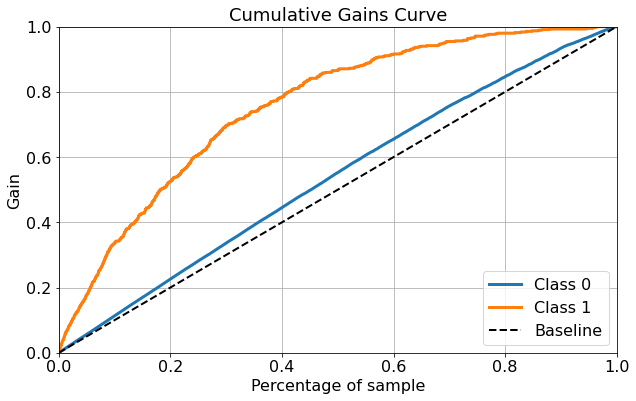

In [49]:
# Gain chart train
import scikitplot as skplt
skplt.metrics.plot_cumulative_gain(np.array(y_train), model.predict_proba(temp_train[selected_features]), figsize=(10, 6), title_fontsize=18, text_fontsize=16)
plt.show()

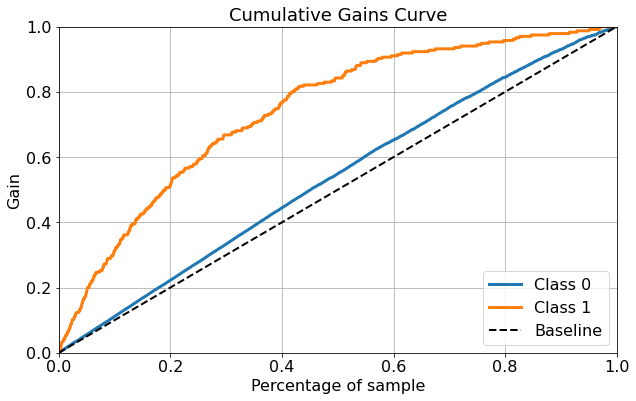

In [50]:
# Gain chart test
skplt.metrics.plot_cumulative_gain(np.array(y_test), model.predict_proba(temp_test[selected_features]), figsize=(10, 6), title_fontsize=18, text_fontsize=16)
plt.show()

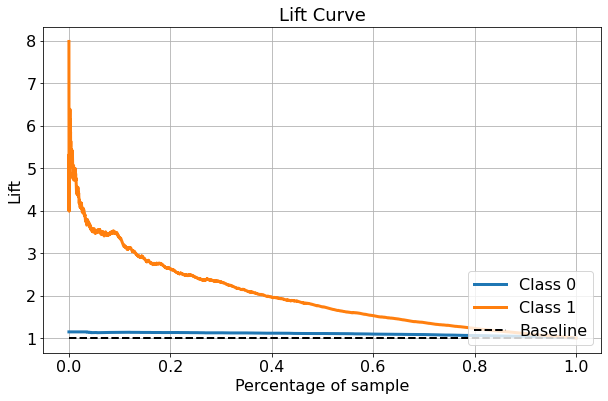

In [51]:
#Lift Chart train
skplt.metrics.plot_lift_curve(np.array(y_train), model.predict_proba(temp_train[selected_features]), figsize=(10, 6), title_fontsize=18, text_fontsize=16)
plt.show()

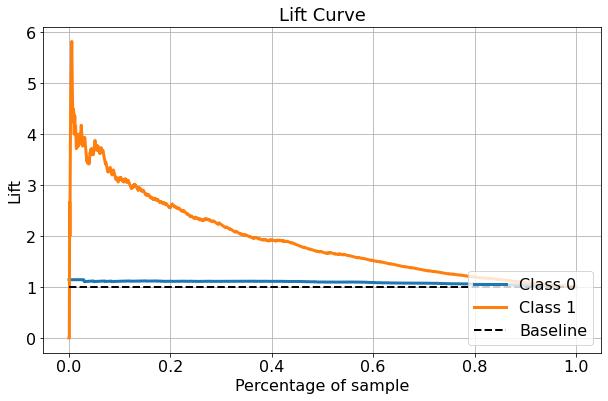

In [52]:
#Lift Chart test
skplt.metrics.plot_lift_curve(np.array(y_test), model.predict_proba(temp_test[selected_features]), figsize=(10, 6), title_fontsize=18, text_fontsize=16)
plt.show()

In [ ]:
def model_bin(x):
    if x < 0.184:
        return 1
    if x < 0.302:
        return 2
    if x < 0.405:
        return 3
    if x < 0.546:
        return 4
    else:
        return 5

In [ ]:
df_train = x_train.copy()
df_train['fpd_plus_3'] = y_train

df_test = x_test.copy()
df_test['fpd_plus_3'] = y_test

In [ ]:
df_train['proba'] = model.predict_proba(df_train[selected_features])[:,1:].flatten()
df_test['proba'] = model.predict_proba(df_test[selected_features])[:,1:].flatten()

In [ ]:
df_train['proba'] = np.round(df_train['proba'], 3)
df_train['DecileRank']= pd.qcut(df_train['proba'], q = 5)
df_stats = pd.DataFrame(df_train.groupby(by='DecileRank')['fpd_plus_3'].mean())
df_stats['volume'] = df_train.groupby(by='DecileRank')['fpd_plus_3'].size()
df_stats

In [ ]:
df_test['proba'] = np.round(df_test['proba'], 3)
df_test['DecileRank']= pd.qcut(df_test['proba'], q = 5)
df_stats = pd.DataFrame(df_test.groupby(by='DecileRank')['fpd_plus_3'].mean())
df_stats['volume'] = df_test.groupby(by='DecileRank')['fpd_plus_3'].size()
df_stats

In [ ]:
# pickle.dump(model, open('rs1_model_1.pkl', 'wb'))

In [ ]:

# selected_features = [ 'ratio_ach_debit_amt_90_180', 'ratio_debit_credit_180',
#        'median_amount_debited_1m', 'distinct_pd_txns_3m',
#        'distinct_ach_d_txns_6m', 'card_size_1m',
#        'ratio_card_amt_total_debit_3m', 'ratio_ach_freq_debit_credit_1m',
#        'ratio_ach_freq_debit_credit_6m',
#        'ratio_total_freq_debit_credit_6m', 'ratio_debit_credit_1m',
#        'ratio_debit_credit_6m', 'stddev_running_balance_6m',
#        'od_count_3m', 'count_all_logins_per_quarter']


# selected_features = list(model.feature_names_in_)



# feat_imp, train_ro, test_ro, all_ro, train_metrics, test_metrics, train_model, scale_train_object, minmax_train, temp_train, temp_test, y_train, y_test,df_prep, train_data_params, train_min_max_params = ptest.Pipeline_OS_2_Test(df_raw,selected_features,params_data)

In [ ]:
test_ro

In [ ]:
train_ro

In [ ]:
all_ro

In [ ]:
selected_features

In [ ]:
def model_bin(x):
    if x < 0.23:
        return 1
    if x < 0.33:
        return 2
    if x < 0.42:
        return 3
    if x < 0.52:
        return 4
    else:
        return 5

def pred(model, df):
    temp = df.copy()
    temp['risk_proba'] = model.predict_proba(temp)[:,1:].flatten()
    temp['risk_score'] = 1000*(1-temp['risk_proba'])
    temp['risk_bin'] = temp['risk_proba'].apply(lambda x: model_bin(x))
    return temp

In [ ]:
pred_df = pred(train_model, df_prep[selected_features])
pred_df

In [ ]:
df_final = df_raw[['business_id','fpd_plus_3']].reset_index().join(pred_df)
df_final = df_final.drop(['index'],axis=1)
df_final

In [ ]:
df_final.to_pickle('/Users/debrishidas/Documents/Work/Projects/tokyo/data/transformed/pilot_data_all.pkl')

In [ ]:
m1 = df_final.groupby('risk_bin').sum().reset_index()[['risk_bin','fpd_plus_3']]
m2 = df_final.groupby('risk_bin').count().reset_index()[['risk_bin','fpd_plus_3']]
mfinal = pd.merge(m1,m2,on='risk_bin')
mfinal['fpd_rate%'] = mfinal['fpd_plus_3_x']*100/mfinal['fpd_plus_3_y']
mfinal = mfinal.rename(columns={'fpd_plus_3_x':'fpd','fpd_plus_3_y':'volume'})
mfinal

In [ ]:
import plotly.express as px
px.histogram(df_final['risk_proba'], nbins=100)

In [ ]:
import plotly.express as px
px.histogram(df_final['risk_score'], nbins=100)

In [ ]:
train_data_params[train_data_params['feature'].isin(selected_features)].to_pickle('/Users/debrishidas/Documents/Work/Projects/tokyo/data/transformed/train_data_params.pkl')
train_data_params[train_data_params['feature'].isin(selected_features)]

In [ ]:
train_min_max_params

In [ ]:
print(len(scale_train_object.feature_names_in_))

pickle.dump(scale_train_object, open('/Users/debrishidas/Documents/Work/Projects/tokyo/models/scale_train_object.pkl','wb'))

In [ ]:
len(train_model.feature_names_in_)

pickle.dump(train_model, open('/Users/debrishidas/Documents/Work/Projects/tokyo/models/train_model.pkl','wb'))